In [7]:
import numpy as np
import pandas as pd
import json
import sys
import os
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
import seaborn as sns

import data_utils

%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

json_file = '../conv_lstm/torch/results_autoencoder/var_ae/lstm_next_step_predictor/exp1_lstm_128_frame_dropout_1/checkpoint_80.json'
FDIR = os.path.dirname(json_file)
NUM_CLASSIFY = 5

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


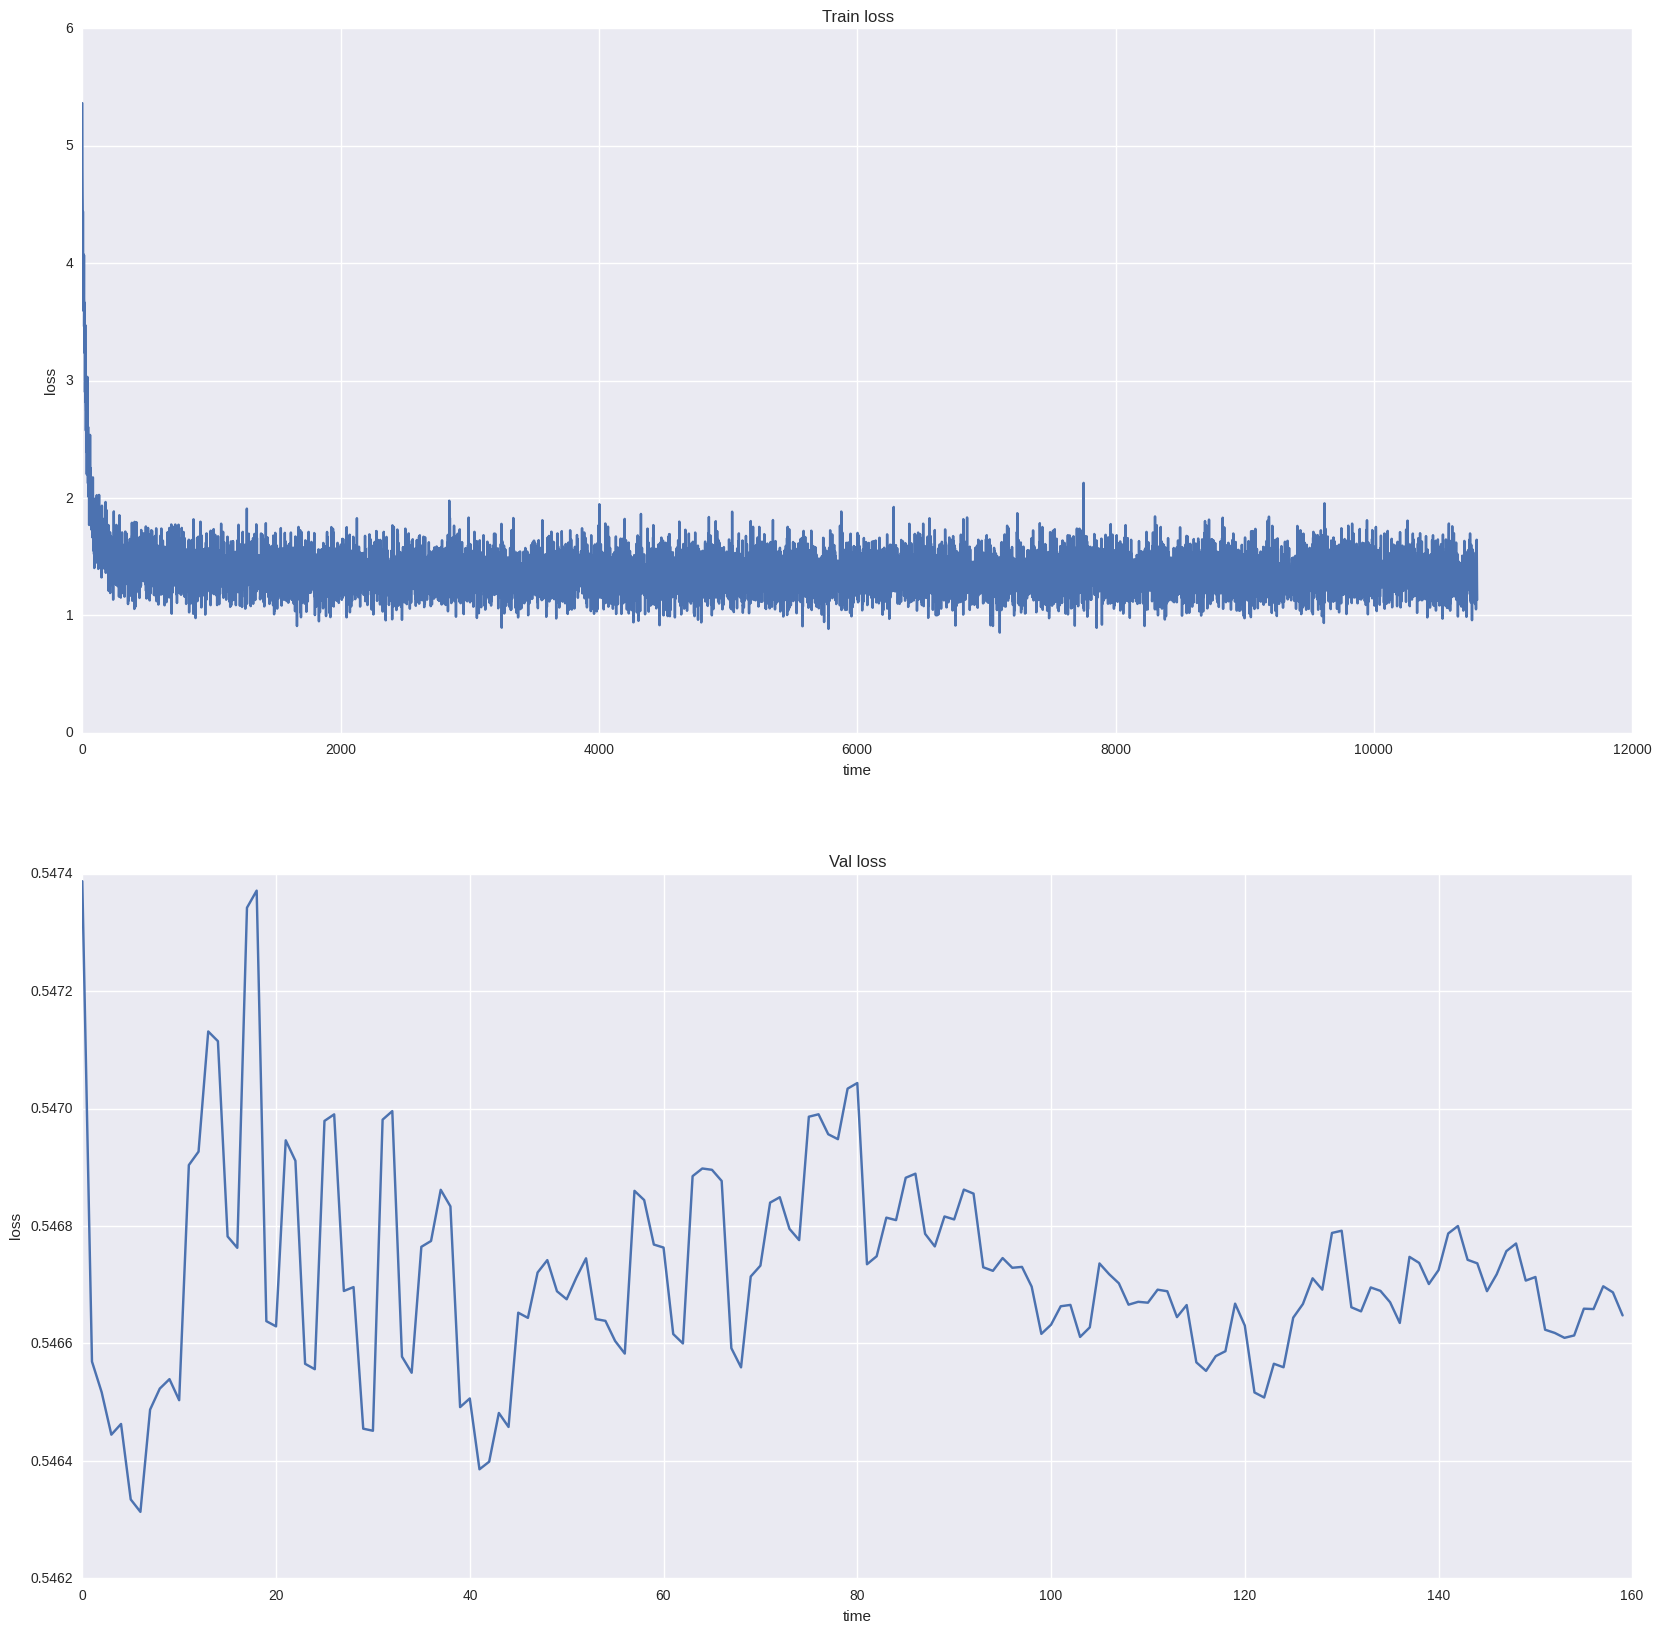

In [8]:
with open(json_file, 'r') as fp:
    data = json.load(fp)
# Loss history might not be of equal length.
train_loss_hist = data['train_loss_history']
val_loss_hist = data['val_loss_history']

# print(train_loss_hist[:1000])

'''
train_loss = np.array(train_loss_hist)
print(np.sum(train_loss < 0.5))
print(train_loss.shape[0])
print(np.min(train_loss))
train_loss[train_loss>5] = 5
train_loss_hist = train_loss.tolist()
'''

plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1)
plt.plot(train_loss_hist)
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.subplot(2, 1, 2)
plt.plot(val_loss_hist)
plt.title('Val loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.show()


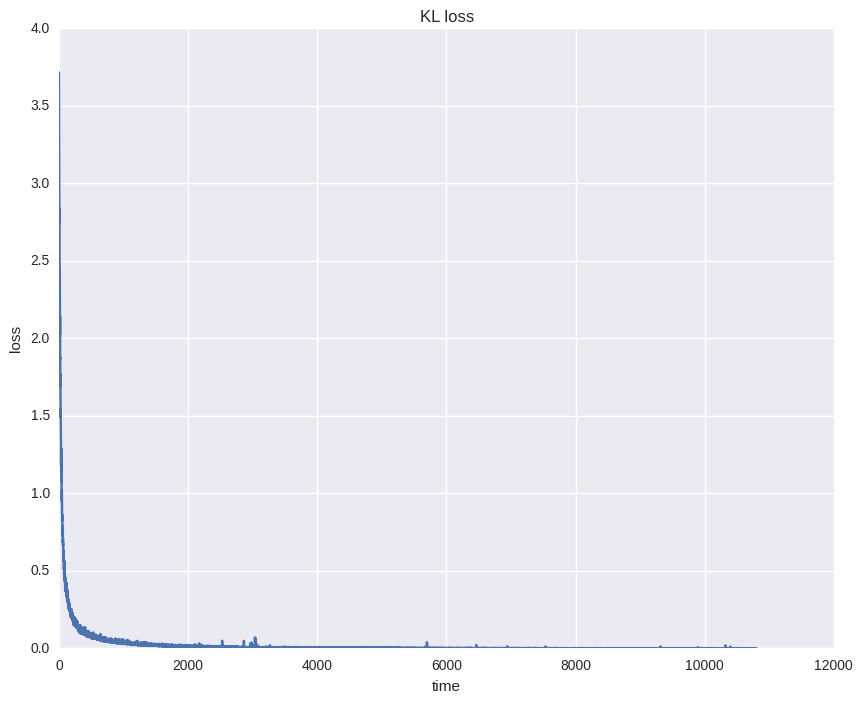

In [9]:
if data.get('KL_loss_history', None) is not None:
    # Loss history might not be of equal length.
    KL_loss_hist = data['KL_loss_history']

    plt.figure(figsize=(10,8))
    plt.plot(KL_loss_hist)
    plt.title('KL loss')
    plt.ylabel('loss')
    plt.xlabel('time')
    plt.show()
